In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.utils  import plot_model
from tensorflow.keras.losses import mse

In [2]:
# fashion_mnist.load_data() :  mnist 데이터를 읽어서 리턴
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
#X_train 이미지를 조회
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
#X_train이미지의 종류를 조회
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
#X_test 이미지를 조회
X_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
# X_test 이미지의 종류를 조회
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [7]:
#X_train.astype('float32')  :  X_train 이미지를 flat32 타입으로 변환
# 하고 255로 나눠줌
X_train = X_train.astype('float32') / 255.

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
#X_test.astype('float32')  :  X_test 이미지를 flat32 타입으로 변환
# 하고 255로 나눠줌
X_test = X_test.astype('float32') / 255.

In [10]:
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
# X_train의 shape 조회
# 28줄, 28칸의 이미지 6만개
X_train.shape

(60000, 28, 28)

In [12]:
# X_test 의 shape 조회
# 28줄, 28칸의 이미지 1만개
X_test.shape

(10000, 28, 28)

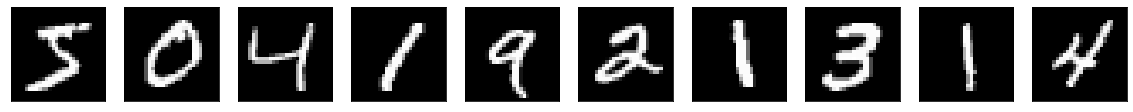

In [13]:
n = 10
# 그래프의 가로 세로 설정
plt.figure(figsize=(20, 4))
#10번 반복
for i in range(n):
  # 1줄 10칸중에 i+1번째 이미지 출력 준비
  ax = plt.subplot(1, n, i + 1)
  # 학습 이미지 출력
  plt.imshow(X_train[i])
  # 흑백으로 줄력
  plt.gray()
  #x축 좌표가 출력되지 않도록 설정
  ax.get_xaxis().set_visible(False)
  #y축 좌표가 출력되지 않도록 설정
  ax.get_yaxis().set_visible(False)


In [14]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [15]:
# 분포에서 2개의 데이터를 선택
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a fashion mnist."""
    # inputs : 학습할 분포의 평균, 표준편차의 로그값이 각각 2개씩  저장된 리스트
    def call(self, inputs):
        # inputs에 저장된 평균을 z_mean에 대입
        # inputs에 저장된 표준편자의 로그값을 z_log_var에 저장 
        z_mean, z_log_var = inputs
        # 데이터의 줄의 수 리턴
        batch =  tf.shape(z_mean)[0]
        # 데이터의 칸의 수 리턴 (평균 표준 편차의 개수)
        dim = tf.shape(z_mean)[1]
        # 평균 0 표준편차 1인 난수 2줄 2칸 생성
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        # log(2) => 2.7    exp(2.7) => 2 : exp는 로그값을 원래 값으로 복원
        # 평균 + (0.5+표준편차로그)의 지수값 * 평균0 표준편차 1인 난수 => 분포에서 2개의 데이터를 랜덤하게 선택 
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [16]:
# 28줄 28칸의 이미지를 입력 받음
encoder_inputs = keras.Input(shape=(28 * 28))
# 256번 선형 회귀
x = layers.Dense(256, activation="relu")(encoder_inputs)
# 128번 선형 회귀
x = layers.Dense(128, activation="relu")(x)
# 64번 선형 회귀
x = layers.Dense(64, activation="relu")(x)
# 16번 선형회귀
x = layers.Dense(16, activation="relu")(x)

# 2개의 평균을 생성
z_mean = layers.Dense(2, name="z_mean")(x)
# 2개의 표준편차 로그값을 생성
z_log_var = layers.Dense(2, name="z_log_var")(x)


In [17]:
# z_mean, z_log_var를 입력받아서 2개의 sample 데이터를 리턴 받음
z = Sampling()([z_mean, z_log_var])

In [18]:
#입력을 받아서 z_mean(평균), z_log_var(표준편차 로그값), z (분포에 포함되는 샘플) 을 리턴받는 모델 생성
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")

In [19]:
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 256)          200960      ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 128)          32896       ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 64)           8256        ['dense_1[0][0]']                
                                                                                            

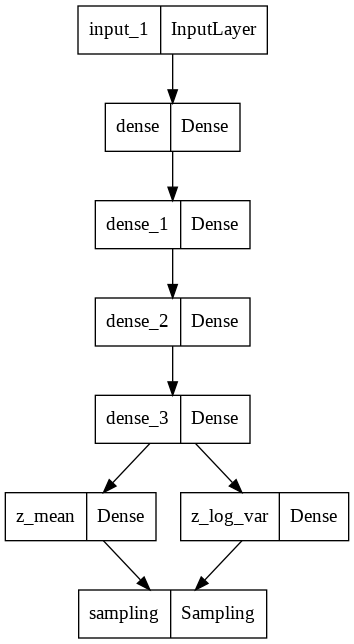

In [20]:
from tensorflow.keras.utils  import plot_model
plot_model(encoder)

In [21]:
# 2개의 샘플데이터를 입력으로 원래 이미지를 복원
# 2칸 입력 받음 (평균, 표준편차)
latent_inputs = keras.Input(shape=(2,))
# 16번 선형회귀
x = layers.Dense(16, activation="relu")(latent_inputs)
# 64번 선형회귀
x = layers.Dense(64, activation="relu")(x)
# 128번 선형 회귀
x = layers.Dense(128, activation="relu")(x)
# 256번 선형 회귀
x = layers.Dense(256, activation="relu")(x)
# 28*28 선형 회귀
decoder_outputs = layers.Dense(28 * 28, activation="sigmoid")(x)


In [22]:
# 2칸의 데이터를 입력 받아서 28*28 출력하는 decoder 생성
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")

In [23]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_4 (Dense)             (None, 16)                48        
                                                                 
 dense_5 (Dense)             (None, 64)                1088      
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 256)               33024     
                                                                 
 dense_8 (Dense)             (None, 784)               201488    
                                                                 
Total params: 243,968
Trainable params: 243,968
Non-trainab

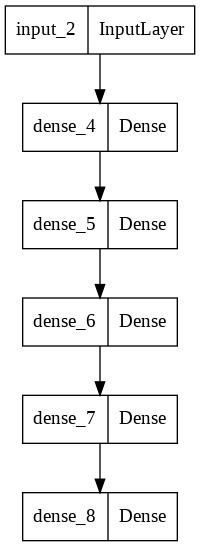

In [24]:
from tensorflow.keras.utils  import plot_model
plot_model(decoder)

In [25]:
# Variational Autoencoder 객체 선언
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        #객체 생성시 실행되는 함수
       
        super(VAE, self).__init__(**kwargs)
         #인코더와 디코더를 입력 받아서 속성에 저장  
        self.encoder = encoder
        self.decoder = decoder
    
    # 학습할때 실행되는 함수
    # 매개변수 data : 학습, 테스트 데이터
    def train_step(self, data):
        # tf.GradientTape() 기울기를 계산해서 weight를 수정할 객체 리턴
        with tf.GradientTape() as tape:
            #입력을 받아서 z_mean(평균), z_log_var(표준편차 로그값), z (분포에 포함되는 샘플) 을 리턴받는 모델 생성
            z_mean, z_log_var, z = self.encoder(data)
            # 2칸의 데이터(2개의 샘플데이터)를 입력 받아서 28*28 출력 (생성 이미지)
            reconstruction = self.decoder(z)
            # 원본이미지와 생성 이미지의 차를 계산  
            reconstruction_loss = mse(data, reconstruction)
            # 오차에 데이터 수를 곱해서 값을 키워줌
            reconstruction_loss *= (28 * 28)
            # 실제 데이터의 분포 p(x) 와 encoder가 추정한 분포 q(x) 사이의 차를 계산
            kl_loss = -0.5*(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var) )
            # 실제 데이터의 분포 p(x) 와 encoder가 추정한 분포 q(x) 사이의 오차의 평균
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=-1))
            # reconstruction_loss (원본과 생성 이미지의 오차) + kl_loss (실제 데이터의 분포 p(x) 와 encoder가 추정한 분포 q(x) 사이의 오차)
            total_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
        # 기울기 계산    
        grads = tape.gradient(total_loss, self.trainable_weights)
        # weight 업데이트
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        # 학습할때 마다 화면에 출력하는 값
        return {
             # reconstruction_loss (원본과 생성 이미지의 오차) + kl_loss (실제 데이터의 분포 p(x) 와 encoder가 추정한 분포 q(x) 사이의 오차) 리턴
            "total_loss": total_loss,
            # 원본이미지와 생성 이미지의 오차 리턴
            "reconstruction_loss": reconstruction_loss,
             # 실제 데이터의 분포 p(x) 와 encoder가 추정한 분포 q(x) 사이의 오차 리턴
            "kl_loss": kl_loss
        }

In [26]:
# 학습데이터를 28*28 칸으로 수정
X_train = X_train.reshape(-1,28*28)

In [27]:
X_train.shape

(60000, 784)

In [28]:
# 테스트 데이터를 28*28 칸으로 수정
X_test = X_test.reshape(-1, 28* 28)

In [29]:
X_test.shape

(10000, 784)

In [30]:
# Variational Autoencoder 객체 생성
vae = VAE(encoder, decoder)

In [31]:
# Variational Autoencoder 옵티마이저 설정
vae.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001))


In [32]:
# Variational Autoencoder학습
vae.fit(X_train, epochs=100, shuffle=True, batch_size=1000)

Epoch 1/100
60/60 [==============================] - 3s 5ms/step - total_loss: 81.0918 - reconstruction_loss: 79.1695 - kl_loss: 1.9223
Epoch 2/100
60/60 [==============================] - 0s 5ms/step - total_loss: 51.8269 - reconstruction_loss: 50.9216 - kl_loss: 0.9052
Epoch 3/100
60/60 [==============================] - 0s 5ms/step - total_loss: 49.6012 - reconstruction_loss: 48.2282 - kl_loss: 1.3729
Epoch 4/100
60/60 [==============================] - 0s 6ms/step - total_loss: 46.9322 - reconstruction_loss: 44.7413 - kl_loss: 2.1909
Epoch 5/100
60/60 [==============================] - 0s 6ms/step - total_loss: 45.6885 - reconstruction_loss: 43.2149 - kl_loss: 2.4736
Epoch 6/100
60/60 [==============================] - 0s 6ms/step - total_loss: 44.4903 - reconstruction_loss: 41.7200 - kl_loss: 2.7703
Epoch 7/100
60/60 [==============================] - 0s 5ms/step - total_loss: 43.3445 - reconstruction_loss: 40.2736 - kl_loss: 3.0709
Epoch 8/100
60/60 [=============================

In [33]:
# 모델 저장
vae.save_weights("/content/drive/MyDrive/cloud_ai/18.gan/workspace/vae_mlp")

In [34]:
# 모델 객체 생성
model = VAE(encoder, decoder)

In [35]:
# 저장한 weight 로드
model.load_weights("/content/drive/MyDrive/cloud_ai/18.gan/workspace/vae_mlp")

In [36]:
# X_test에서 z_mean(평균), z_log_var (표준편차의 로그값), z(분포에서 선택한 샘플 2개씩)
z_mean, z_log_var, z = model.encoder(X_train[0:10])

In [37]:
# 데이터 분포 평균 조회
z_mean

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[ 0.16542879,  0.4513995 ],
       [ 1.7242991 ,  0.3478546 ],
       [ 0.71970594, -1.4577218 ],
       [-1.4485195 ,  1.0774087 ],
       [-0.23520371, -0.9674224 ],
       [ 0.40644875, -0.46030217],
       [-1.6085645 , -0.30434746],
       [-0.24725804,  0.5496697 ],
       [-2.0828443 , -0.25314075],
       [-0.24289939, -0.29745203]], dtype=float32)>

In [38]:
#데이터 분포 표준편차의 로그값 조회
z_log_var

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[-5.5374446, -5.7104735],
       [-5.4882936, -5.374285 ],
       [-5.402432 , -3.9089117],
       [-4.3643026, -4.9198112],
       [-5.3646417, -5.087674 ],
       [-6.6082788, -6.022162 ],
       [-4.707133 , -5.870801 ],
       [-5.814839 , -5.859891 ],
       [-2.953335 , -4.941428 ],
       [-5.971416 , -6.5721316]], dtype=float32)>

In [39]:
# 분포에서 선택한 샘플값
z

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[ 0.12628686,  0.44816634],
       [ 1.7691522 ,  0.42852363],
       [ 0.6434459 , -1.4396324 ],
       [-1.2347821 ,  1.0748345 ],
       [-0.27731416, -0.9750942 ],
       [ 0.3581283 , -0.4751207 ],
       [-1.6511929 , -0.3457408 ],
       [-0.2832756 ,  0.536554  ],
       [-2.425673  , -0.13013625],
       [-0.26451918, -0.2912403 ]], dtype=float32)>

In [40]:
# z를 이용하여 이미지 생성
generate_data = model.decoder(z)

In [41]:
# 생성된 이미지의 모양 조회
generate_data.shape

TensorShape([10, 784])

In [43]:
# 생성된 데이터
generate_data

<tf.Tensor: shape=(10, 784), dtype=float32, numpy=
array([[7.5873351e-05, 5.8423266e-05, 3.4996778e-05, ..., 7.3560397e-05,
        3.3680808e-05, 5.8964226e-05],
       [1.6289928e-07, 1.1997908e-07, 8.1131830e-08, ..., 8.2128873e-09,
        7.0006195e-07, 1.4554995e-07],
       [1.7420530e-07, 6.0148074e-07, 1.6226707e-08, ..., 6.1265588e-08,
        9.9626298e-08, 2.2223220e-07],
       ...,
       [1.2683630e-04, 2.1373952e-04, 1.2963689e-04, ..., 3.4053173e-04,
        1.3629107e-04, 1.6516384e-04],
       [3.0136511e-13, 1.6708396e-12, 3.5366106e-14, ..., 3.4650951e-16,
        1.0069521e-14, 7.7476762e-13],
       [1.3974770e-06, 6.6749629e-07, 2.1457022e-07, ..., 1.8397974e-07,
        2.0868741e-07, 7.8418026e-07]], dtype=float32)>

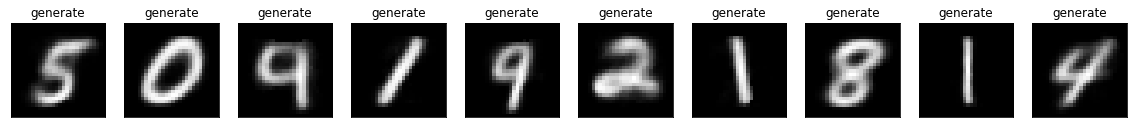

In [42]:
n = 10
# 그래프의 가로 세로 설정
plt.figure(figsize=(20, 4))
#10번 반복
for i in range(n):
  # 1줄 10칸중에 i+1번째 이미지 출력 준비
  ax = plt.subplot(1, n, i + 1)
  plt.title("generate")
  # 생성 이미지 출력
  plt.imshow( generate_data[i].numpy().reshape(28,28) )
  # 흑백으로 줄력
  plt.gray()
  #x축 좌표가 출력되지 않도록 설정
  ax.get_xaxis().set_visible(False)
  #y축 좌표가 출력되지 않도록 설정
  ax.get_yaxis().set_visible(False)